## Bikeshare System
### System Requirements
* Define possible outcomes for random variables
* Assign probabilities
* Define relationships between random variables
* Get multiple outcomes by repeated random sampling
* Analyze sample outcomes

In [2]:
try:
    import pint
except ImportError:
    !pip install pint

In [3]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [4]:
# import functions from modsim

from modsim import *

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Simulation

In [21]:
def run_simulation(state, p1, p2, num_steps):
    """Simulate the given number of time steps.

    state: State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    results = TimeSeries()
    results[0] = state.olin

    for i in range(num_steps):
        step(state, p1, p2)
        results[i+1] = state.olin

    results.plot(label='Olin')
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)',
             ylabel='Number of bikes')

### Define Step

In [22]:
def step(state, p1, p2):
    """Simulate one time step.

    state: bikeshare State object
    p1: probability of an Olin->Wellesley ride
    p2: probability of a Wellesley->Olin ride
    """
    if flip(p1):
        bike_to_wells(state)

    if flip(p2):
        bike_to_olin(state)

### Define Bike to Olin

In [23]:
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.

    state: bikeshare State object
    """
    if state.wells == 0:
        state.wells_unhappy += 1
        return
    state.wells -= 1
    state.olin += 1

### Define bike to Wellesley

In [24]:
def bike_to_wells(state):
    """Move one bike from Olin to Wellesley.

    state: bikeshare State object
    """
    if state.olin == 0:                 # bike_to_wells = origin olin
        state.wells_unhappy += 1
        return
    state.olin -= 1 #origin
    state.wells += 1

Test

In [25]:
bikeshare = State(olin=0, wells=12,
                  olin_unhappy=0, wells_unhappy=0 )

In [26]:
bike_to_wells(bikeshare)

In [27]:
show(bikeshare)

,state
olin,0
wells,12
olin_unhappy,0
wells_unhappy,1


### Visualize

In [28]:
bikeshare = State(olin=10, wells=2,
                  olin_unhappy=0, wells_unhappy=0 )

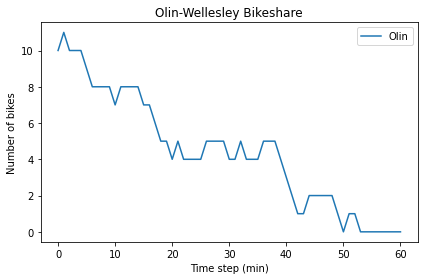

In [29]:
run_simulation(bikeshare, 0.3, 0.2, 60)

### Optimize
Minimize # of customers dont get bike

In [48]:
# def bike_to_olin(state):
#     """Move one bike from Wellesley to Olin.
#
#     state: bikeshare State object
#     """
#     if state.wells == 0:
#         state.wells_unhappy += 1
#         return
#     state.wells -= 1
#     state.olin += 1

def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.

    state: bikeshare State object
    """
    if state.wells == 0 and (state.wells_unhappy or state.olin_unhappy):
        state.wells = state.wells_unhappy
    state.wells_unhappy +=1
    state.wells -= 1
    state.olin += 1

test

In [49]:
bikeshare = State(olin=10, wells=2,
                  olin_unhappy=0, wells_unhappy=0 )

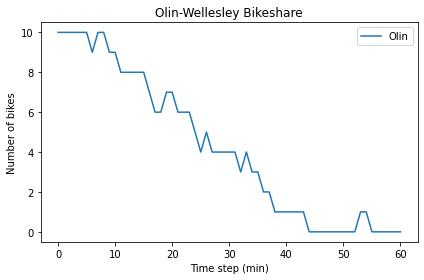

In [50]:
run_simulation(bikeshare, 0.3, 0.2, 60)

## Base python

In [42]:
import matplotlib.pyplot as plt, pandas as pd

In [58]:
def runsim2(t,p1,p2,o,w): #function to run simulation
    tmp1,tmp2=[],[] #initialize series
    tmp1.append(o) #append start for Olin
    tmp2.append(w) #append start for Wellesley
    for i in range(t): #loop
        if np.random.uniform()<=p1 and o>0: #check p1 and zero bike status. could use elif to log zeros
            o,w=o-1,w+1
        if np.random.uniform()<=p2 and w>0: #check p2 and zero bike status. could use elif to log zeros
            o,w=o+1,w-1
        tmp1.append(o) #append bike changes
        tmp2.append(w) #append bike changes
    return(pd.Series(tmp1), pd.Series(tmp2)) #return series

In [61]:
o,w=runsim2(60,.3,.2,10, 2) #run sim and log both series in variables

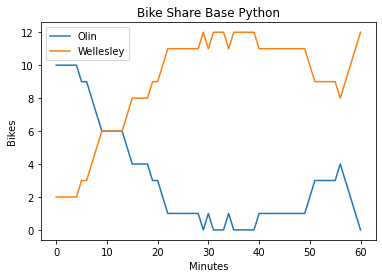

In [62]:
o.plot(), w.plot() #plot pandas
plt.title('Bike Share Base Python')
plt.xlabel("Minutes")
plt.ylabel("Bikes")
plt.legend(['Olin','Wellesley'])
plt.show()